In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# dictionaries
ORCHIDEE = {
    'pft_type': [2,3,4,5,6,7,8,9,10,12],
    'pft_name': ['TrBE','TrBD','TeNE','TeBE','TeBD','BoNE','BoBD','BoND','natural C3','agri. C3']
}

JULES = {
    'pft_type': [1,2,5],
    'pft_name': ['BT', 'NT', 'SH']
}

ISAM = {
    'pft_type': [ 1.,  3.,  4.,  5., 20.,  6.,  7.,  8., 12., 13.],
    'pft_name': ['TrE', 'TeE', 'TeD', 'BoNE', 'BoD', 'SAV', 'GRA', 'SHR', 'CRO', 'Pasture']
}

JSBACH = {
    'pft_type': [1,2,3,4,5,7,11],
    'pft_name': ['TrE', 'TrD', 'ExTrE', 'ExTrD', 'Raingreen SHR', 'C3 grass', 'Crop']
}

In [76]:
# read files
MODEL_NAME = 'JSBACH'
test_size = 20
smp_times = 200
Dir = '/TRENDYv6/'
df = pd.read_csv(Dir + '%s_sz=%r_tm=%r.csv'%(MODEL_NAME, test_size, smp_times),usecols=[1,2])
df_all = pd.read_csv(Dir + '%s_sz=%r_tm=%r_all.csv'%(MODEL_NAME, test_size, smp_times),usecols=[1,2])
df_n = pd.read_csv(Dir + '%s_pixel_num.csv'%(MODEL_NAME), index_col=0)
dic = eval(MODEL_NAME if MODEL_NAME!='ORCHIDEE-MICT' else 'ORCHIDEE')
pft_type = dic['pft_type']
pft_name = dic['pft_name']

In [77]:
llb, lb, median, ub, uub = df_all['Slope'].quantile([.1, .25, .5, .75, .9]).round(2)
print('slope [1st, 3rd]: %.2f [%.2f, %.2f]'%(median, lb, ub))

# print(llb, lb, median, ub, uub)
# mean R2
# df_all['R2'].mean(), df_all['R2'].median()
lb_r, median_r, ub_r = df_all['R2'].quantile([.25, .5, .75])
print('R2 [1st, 3rd]: %.2f [%.2f, %.2f]'%(median_r, lb_r, ub_r))

slope [1st, 3rd]: 0.70 [0.65, 0.74]
R2 [1st, 3rd]: 0.85 [0.81, 0.89]


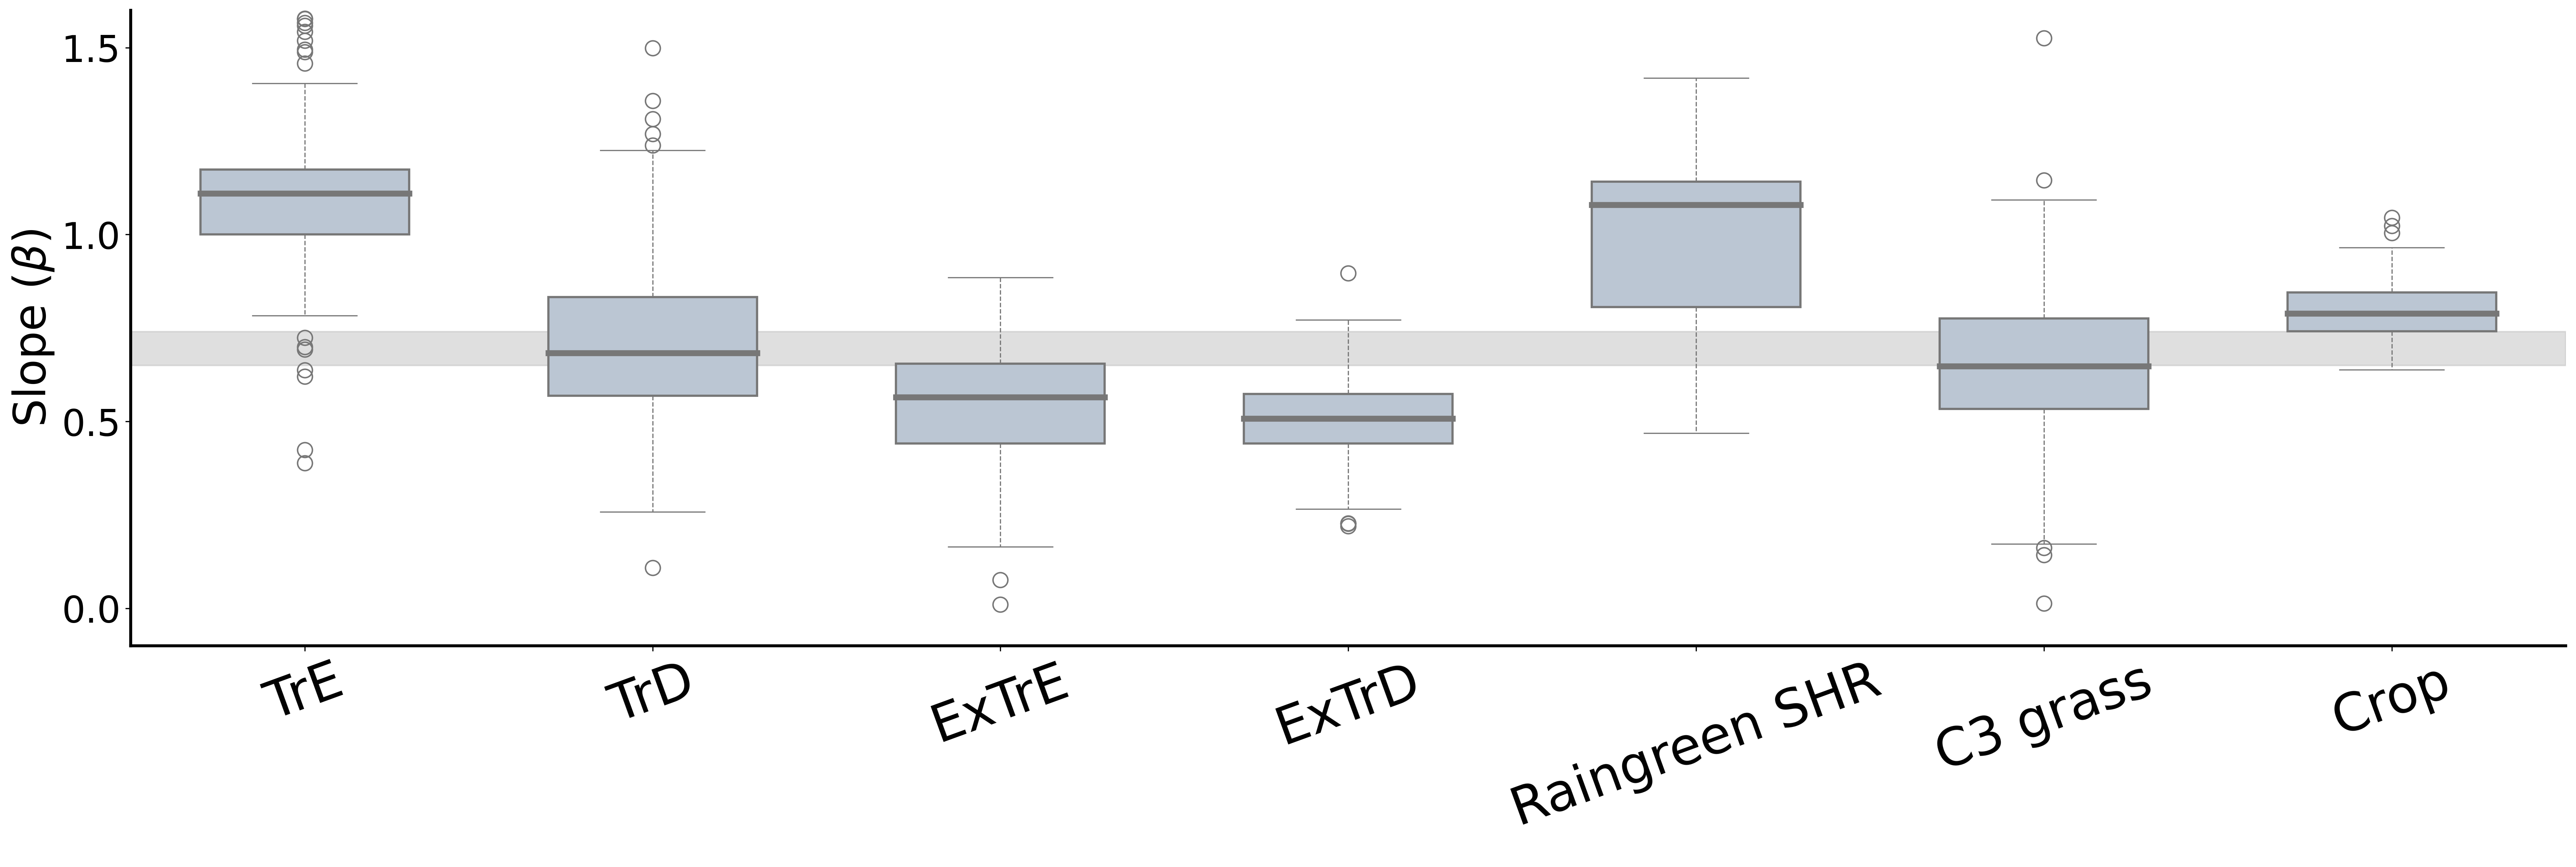

In [78]:
fig, ax = plt.subplots(figsize=(24,8),
                        dpi=300,
                        layout='constrained')
x_fb = np.arange(len(pft_type)+1)-.5
y_zeros = np.zeros(len(pft_type)+1)
ax.fill_between(x_fb, y1=lb+y_zeros, y2=ub+y_zeros, zorder=0,
                color='silver', alpha=.5)

ax = sns.boxplot(data=df, x="vegtype", y="slope",
        color='lightsteelblue',
        width=.6,
        capwidths=.3,
        saturation=0.5,
        ax=ax,
        medianprops = {"linewidth": 4},
        whiskerprops = {"linestyle": 'dashed',
                        "lw": 0.8},
        flierprops = {"marker": "o",
                    "markersize": "10",
                    "mfc": 'None'},
        capprops = {"lw": 0.8},
        )

ax.xaxis.set_tick_params(labelsize=35,labelrotation=20)
ax.set_yticks(np.arange(0, 2.1, .5))
ax.yaxis.set_tick_params(labelsize=25)
ax.set_xticklabels(pft_name)
ax.set_xlabel(" ")
# ax.set_ylabel(" ")
ax.set_ylabel(r"Slope ($\beta$)", fontsize=30)
ax.set_ylim(-.1, 1.6)

ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [79]:
## model ensemble
a = np.array([0.521, 0.600, 0.6955, 0.5559, 0.5561])
a.mean()

0.5856999999999999

In [80]:
df_n

,PFT
1.0,659
11.0,579
7.0,543
3.0,473
4.0,453
2.0,86
5.0,66


In [81]:
df_grouped = df.groupby(by='vegtype').quantile([.5, .25, .75]).round(2).transpose()
for vegtype, vegname in zip(pft_type, pft_name):
    median = df_grouped[(vegtype, 0.5)]
    lb = df_grouped[(vegtype, 0.25)]
    ub = df_grouped[(vegtype, 0.75)]
    N = df_n.loc[vegtype, 'PFT']
    print('%r, %r, N=%d'%(vegtype, vegname, N))
    print('slope [1st, 3rd]: %.2f [%.2f, %.2f]\n'%(median, lb, ub))

1, 'TrE', N=659
slope [1st, 3rd]: 1.11 [1.00, 1.17]

2, 'TrD', N=86
slope [1st, 3rd]: 0.68 [0.57, 0.83]

3, 'ExTrE', N=473
slope [1st, 3rd]: 0.56 [0.44, 0.65]

4, 'ExTrD', N=453
slope [1st, 3rd]: 0.51 [0.44, 0.57]

5, 'Raingreen SHR', N=66
slope [1st, 3rd]: 1.08 [0.81, 1.14]

7, 'C3 grass', N=543
slope [1st, 3rd]: 0.65 [0.53, 0.78]

11, 'Crop', N=579
slope [1st, 3rd]: 0.79 [0.74, 0.84]

